In [1]:
%pylab inline
import pandas as pd
import uproot
import awkward as ak
from yahist import Hist1D
from yahist.utils import plot_stack
import mplhep as hep
plt.style.use([hep.style.CMS, hep.style.firamath])

Populating the interactive namespace from numpy and matplotlib


In [2]:
t = uproot.open("../output/run2_all_with_isoTrack_isolation_no_HHggZZ.root")["t"]
mc_df = t.arrays(library="pd")

In [3]:
t = uproot.open("../output/run2_all_with_isoTrack_isolation_no_HHggZZ_with_gjets.root")["t"]
data_df = t.arrays(library="pd")

In [4]:
mc_df = mc_df.loc[mc_df["process_id"] == 8]
data_df = data_df.loc[data_df["process_id"] == 8]

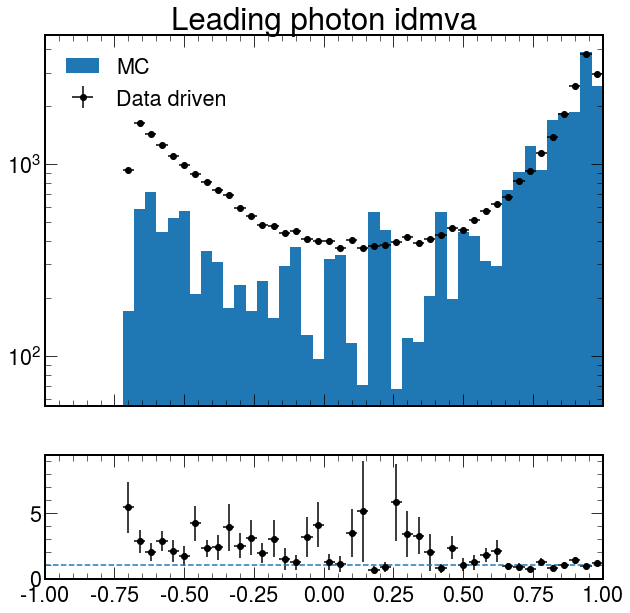

In [5]:
# plots of stuff

quantity = "g1_idmva"
title = "Leading photon idmva"
bins="50,-1,1"
mcHist = Hist1D(mc_df[quantity], bins=bins, label="MC", weights=mc_df["weight"])
dataHist = Hist1D(data_df[quantity], bins=bins, label="Data driven", weights=data_df["weight"])

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
ax1.set_title(title)
mcHist.plot(histtype="stepfilled", ax=ax1)
dataHist.plot(show_errors=True, color="k", ax=ax1)
ax1.set_yscale("log")
ratio_hist = dataHist.copy()
ratio_hist /= mcHist

ratio_hist.plot(show_errors=True, color="k", ax=ax2)
x = np.linspace(mcHist.bin_centers[0] - mcHist.bin_widths[0] / 2, mcHist.bin_centers[-1] + mcHist.bin_widths[0] / 2, 100)
plt.plot(x, np.ones_like(x), "--")
ax2.legend().remove()

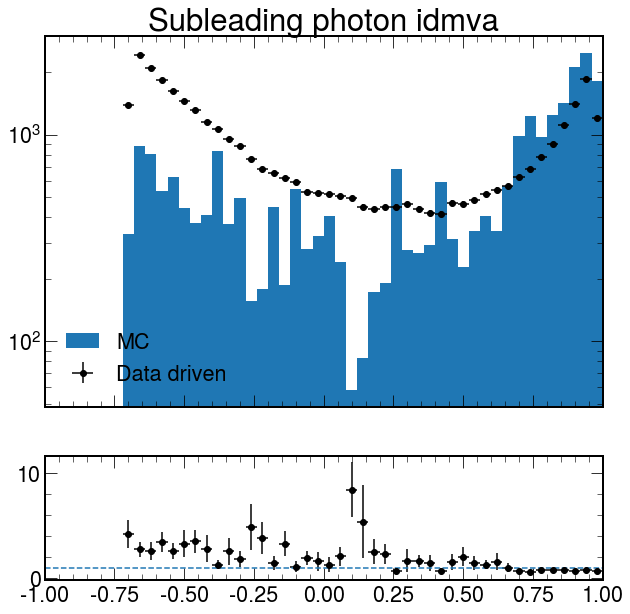

In [10]:
# plots of stuff

quantity = "g2_idmva"
title = "Subleading photon idmva"
bins="50,-1,1"
mcHist = Hist1D(mc_df[quantity], bins=bins, label="MC", weights=mc_df["weight"])
dataHist = Hist1D(data_df[quantity], bins=bins, label="Data driven", weights=data_df["weight"])
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
ax1.set_title(title)
mcHist.plot(histtype="stepfilled", ax=ax1)
dataHist.plot(show_errors=True, color="k", ax=ax1)
ax1.set_yscale("log")
ratio_hist = dataHist.copy()
ratio_hist /= mcHist

ratio_hist.plot(show_errors=True, color="k", ax=ax2)
x = np.linspace(mcHist.bin_centers[0] - mcHist.bin_widths[0] / 2, mcHist.bin_centers[-1] + mcHist.bin_widths[0] / 2, 100)
plt.plot(x, np.ones_like(x), "--")
ax2.legend().remove()